In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [452]:
data = pd.read_csv('training.csv', sep=';')
test = pd.read_csv('test.csv', sep=';')
data.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No


In [453]:
set(data.columns.values.tolist()) - set(test.columns.values.tolist())

{'RISK_MM', 'RainToday', 'RainTomorrow'}

In [454]:
data.Date = data.Date.apply(pd.to_datetime)
data['Year'] = data.Date.apply(lambda x: x.year)
data['Month'] = data.Date.apply(lambda x: x.month)
data['Day'] = data.Date.apply(lambda x: x.day)
data.drop(['Date', 'RISK_MM', 'RainToday'], axis=1, inplace=True)

In [455]:
test.Date = test.Date.apply(pd.to_datetime)
test['Year'] = test.Date.apply(lambda x: x.year)
test['Month'] = test.Date.apply(lambda x: x.month)
test['Day'] = test.Date.apply(lambda x: x.day)
test.drop('Date', axis=1, inplace=True)

In [440]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am       object
Pressure3pm       object
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow      object
Year               int64
Month              int64
Day                int64
dtype: object

In [441]:
test.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am       object
Pressure3pm       object
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
Year               int64
Month              int64
Day                int64
dtype: object

In [456]:
data.Pressure3pm = data.Pressure3pm.apply(lambda x : x if type(x) != str else float(x.replace(',', '.')))
test.Pressure3pm = test.Pressure3pm.apply(lambda x : x if type(x) != str else float(x.replace(',', '.')))
data.Pressure9am = data.Pressure9am.apply(lambda x : x if type(x) != str else float(x.replace(',', '.')))
test.Pressure9am = test.Pressure9am.apply(lambda x : x if type(x) != str else float(x.replace(',', '.')))

In [443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 24 columns):
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustDir      65571 non-null object
WindGustSpeed    65579 non-null float64
WindDir9am       63981 non-null object
WindDir3pm       68343 non-null object
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null float64
Pressure3pm      62389 non-null float64
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainTomorrow     70240 non-null object
Year             70240 non-null int64
Month            7

In [444]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17601 entries, 0 to 17600
Data columns (total 23 columns):
Location         17601 non-null object
MinTemp          17503 non-null float64
MaxTemp          17544 non-null float64
Rainfall         17438 non-null float64
Evaporation      6803 non-null float64
Sunshine         5163 non-null float64
WindGustDir      16696 non-null object
WindGustSpeed    16696 non-null float64
WindDir9am       16448 non-null object
WindDir3pm       16880 non-null object
WindSpeed9am     17510 non-null float64
WindSpeed3pm     16963 non-null float64
Humidity9am      17377 non-null float64
Humidity3pm      16843 non-null float64
Pressure9am      15803 non-null float64
Pressure3pm      15803 non-null float64
Cloud9am         9979 non-null float64
Cloud3pm         9601 non-null float64
Temp9am          17551 non-null float64
Temp3pm          17004 non-null float64
Year             17601 non-null int64
Month            17601 non-null int64
Day              17601 

In [445]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,69882.000000,70080.000000,69428.000000,42191.000000,37113.000000,65579.000000,69212.000000,69152.000000,69185.000000,69305.000000,62341.000000,62389.000000,45778.000000,45115.000000,69502.000000,69581.000000,70240.000000,70240.000000,70240.000000
mean,11.355741,22.152277,2.472825,4.925332,7.229785,39.641044,13.557519,18.313801,71.686551,53.264873,1018.206670,1015.860462,4.531478,4.640386,15.879927,20.721841,2011.856862,6.456364,15.712842
std,6.292392,6.830980,8.810472,3.614322,3.820706,14.228323,9.242076,9.275690,17.734285,20.350925,7.076017,6.980285,2.866080,2.665981,6.202170,6.642916,2.059297,3.374853,8.805133
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-5.100000,2007.000000,1.000000,1.000000
25%,6.800000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,39.000000,1013.500000,1011.200000,1.000000,2.000000,11.400000,16.000000,2010.000000,4.000000,8.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,1018.200000,1015.800000,5.000000,5.000000,15.800000,20.300000,2012.000000,7.000000,16.000000
75%,16.200000,26.800000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.000000,67.000000,1023.000000,1020.600000,7.000000,7.000000,20.500000,25.200000,2014.000000,9.000000,23.000000
max,30.500000,47.300000,371.000000,64.800000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.100000,2016.000000,12.000000,31.000000


In [446]:
data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [447]:
data.RainTomorrow.value_counts()/len(data)

No     0.768408
Yes    0.231592
Name: RainTomorrow, dtype: float64

In [457]:
numeric_cols = [col for col in data.columns if data[col].dtype != 'O']
binary_cols = ['RainTomorrow', 'WindDirChange']
category_cols = list(set(data.columns.values.tolist()) - set(numeric_cols) - set(binary_cols))

In [458]:
data['WindSpeedDelta'] = data.WindSpeed3pm - data.WindSpeed9am
data['WindDirChange'] = data.WindDir3pm != data.WindDir9am
data['HumidityDelta'] = data.Humidity3pm - data.Humidity9am
data['PressureDelta'] = data.Pressure3pm - data.Pressure9am
data['CloudDelta'] = data.Cloud3pm - data.Cloud9am
data['TempDelta'] = data.Temp3pm - data.Temp9am
test['WindSpeedDelta'] = test.WindSpeed3pm - test.WindSpeed9am
test['WindDirChange'] = test.WindDir3pm != test.WindDir9am
test['HumidityDelta'] = test.Humidity3pm - test.Humidity9am
test['PressureDelta'] = test.Pressure3pm - test.Pressure9am
test['CloudDelta'] = test.Cloud3pm - test.Cloud9am
test['TempDelta'] = test.Temp3pm - test.Temp9am
data.RainTomorrow = data.RainTomorrow.apply(lambda x : x == 'Yes')

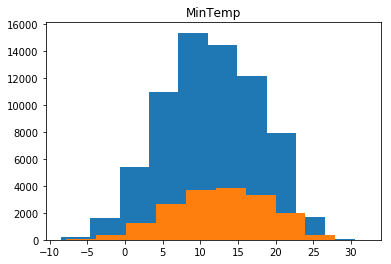

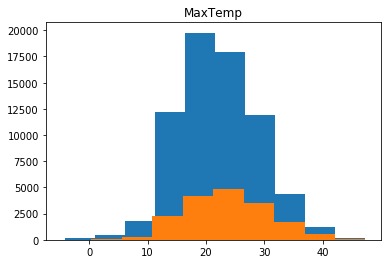

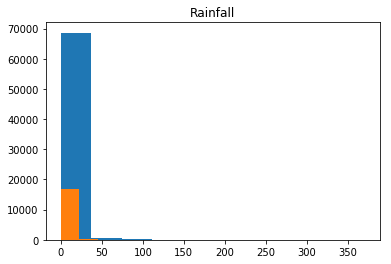

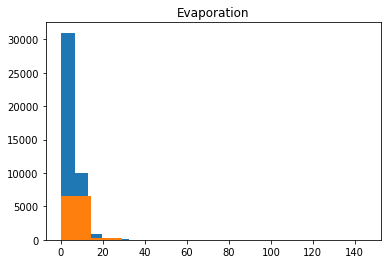

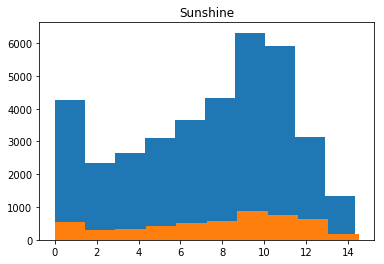

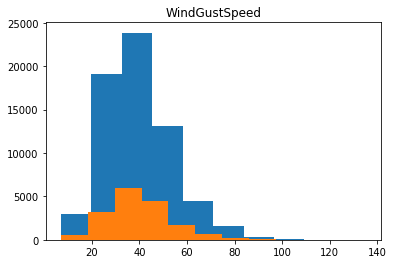

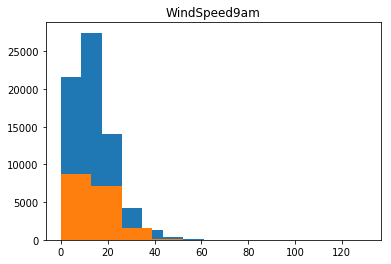

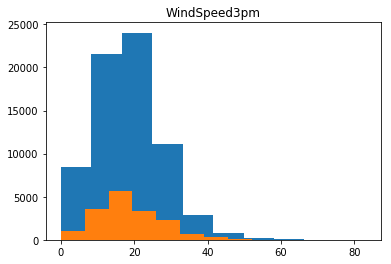

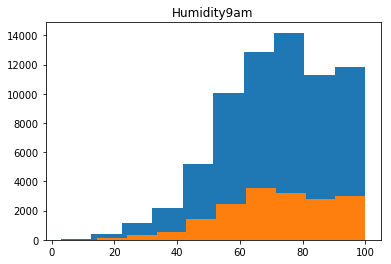

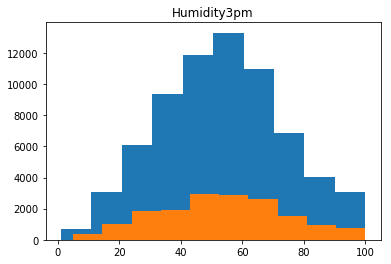

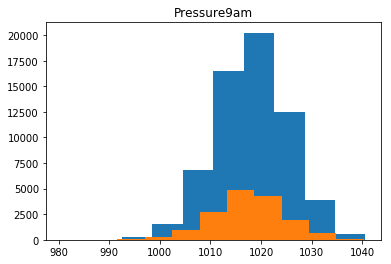

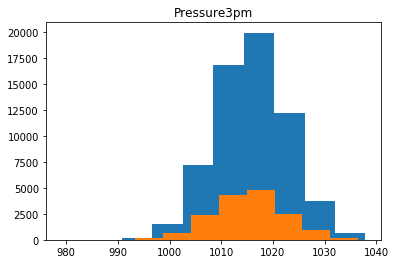

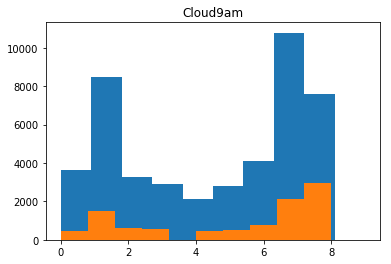

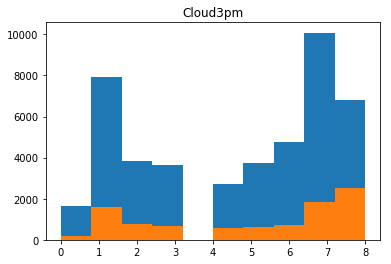

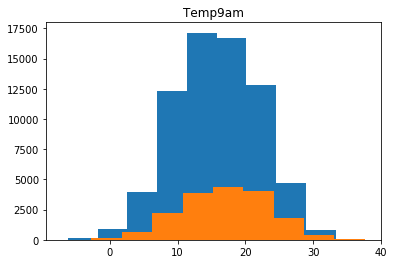

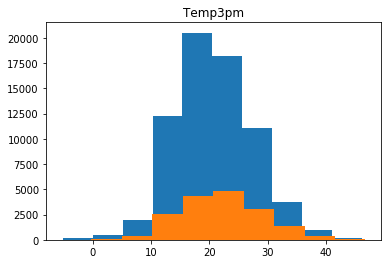

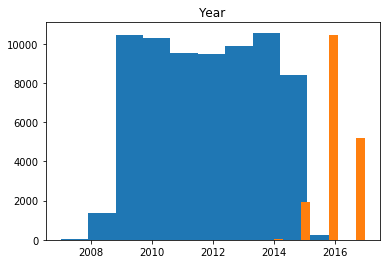

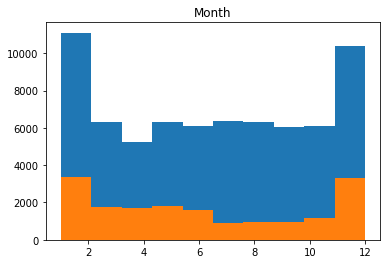

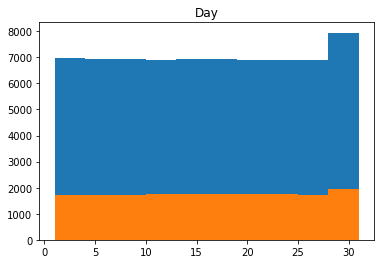

In [459]:
for col in numeric_cols:
    plt.hist(data[col])
    plt.hist(test[col])
    plt.title(col)
    plt.show()

In [402]:
category_cols

['Location', 'WindDir9am', 'WindDir3pm', 'WindGustDir']

In [403]:
data[category_cols].isnull().sum()

Location          0
WindDir9am     6259
WindDir3pm     1897
WindGustDir    4669
dtype: int64

In [404]:
for category in category_cols:
    print(category, len(data[category].unique()))

Location 30
WindDir9am 17
WindDir3pm 17
WindGustDir 17


In [405]:
for category in category_cols:
    print(data[category].value_counts())

Canberra            2733
Sydney              2669
Brisbane            2528
Bendigo             2426
Ballarat            2421
Albury              2407
MelbourneAirport    2406
Mildura             2405
SydneyAirport       2403
Sale                2399
Tuggeranong         2398
Watsonia            2398
Portland            2396
Cairns              2389
Cobar               2389
Wollongong          2385
WaggaWagga          2380
NorfolkIsland       2370
Penrith             2369
Newcastle           2363
CoffsHarbour        2361
Richmond            2360
Dartmoor            2353
NorahHead           2342
BadgerysCreek       2341
MountGinini         2325
Moree               2282
Williamtown         2041
Melbourne           1947
Nhil                1254
Name: Location, dtype: int64
N      5909
W      4999
SW     4943
SSE    4477
S      4426
NW     4245
SSW    4060
WNW    4040
WSW    3920
SE     3792
NNE    3680
E      3339
NE     3174
NNW    3171
ENE    3149
ESE    2657
Name: WindDir9am, dtype: int6

In [406]:
data[numeric_cols].isnull().sum()

MinTemp             358
MaxTemp             160
Rainfall            812
Evaporation       28049
Sunshine          33127
WindGustSpeed      4661
WindSpeed9am       1028
WindSpeed3pm       1088
Humidity9am        1055
Humidity3pm         935
Pressure9am        7899
Pressure3pm        7851
Cloud9am          24462
Cloud3pm          25125
Temp9am             738
Temp3pm             659
RainTomorrow          0
Year                  0
Month                 0
Day                   0
WindSpeedDelta     1466
WindDirChange         0
HumidityDelta      1507
PressureDelta      8018
CloudDelta        26986
TempDelta          1156
dtype: int64

In [435]:
data[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,Year,Month,Day,WindSpeedDelta,HumidityDelta,PressureDelta,CloudDelta,TempDelta
count,69882.000000,70080.000000,69428.000000,42191.000000,37113.000000,65579.000000,69212.000000,69152.000000,69185.000000,69305.000000,...,69502.000000,69581.000000,70240.000000,70240.000000,70240.000000,68774.000000,68733.000000,62222.000000,43254.000000,69084.000000
mean,11.355741,22.152277,2.472825,4.925332,7.229785,39.641044,13.557519,18.313801,71.686551,53.264873,...,15.879927,20.721841,2011.856862,6.456364,15.712842,4.749818,-18.502015,-2.348660,0.110117,4.871552
std,6.292392,6.830980,8.810472,3.614322,3.820706,14.228323,9.242076,9.275690,17.734285,20.350925,...,6.202170,6.642916,2.059297,3.374853,8.805133,8.780057,16.936178,1.959347,2.512027,3.645247
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,...,-6.200000,-5.100000,2007.000000,1.000000,1.000000,-57.000000,-91.000000,-13.900000,-8.000000,-12.200000
25%,6.800000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,39.000000,...,11.400000,16.000000,2010.000000,4.000000,8.000000,0.000000,-30.000000,-3.600000,-1.000000,2.100000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,...,15.800000,20.300000,2012.000000,7.000000,16.000000,4.000000,-18.000000,-2.500000,0.000000,4.400000
75%,16.200000,26.800000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.000000,67.000000,...,20.500000,25.200000,2014.000000,9.000000,23.000000,10.000000,-7.000000,-1.300000,1.000000,7.400000
max,30.500000,47.300000,371.000000,64.800000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,...,37.700000,46.100000,2016.000000,12.000000,31.000000,78.000000,76.000000,10.100000,8.000000,23.000000


Text(0, 0.5, 'WindGustSpeed')

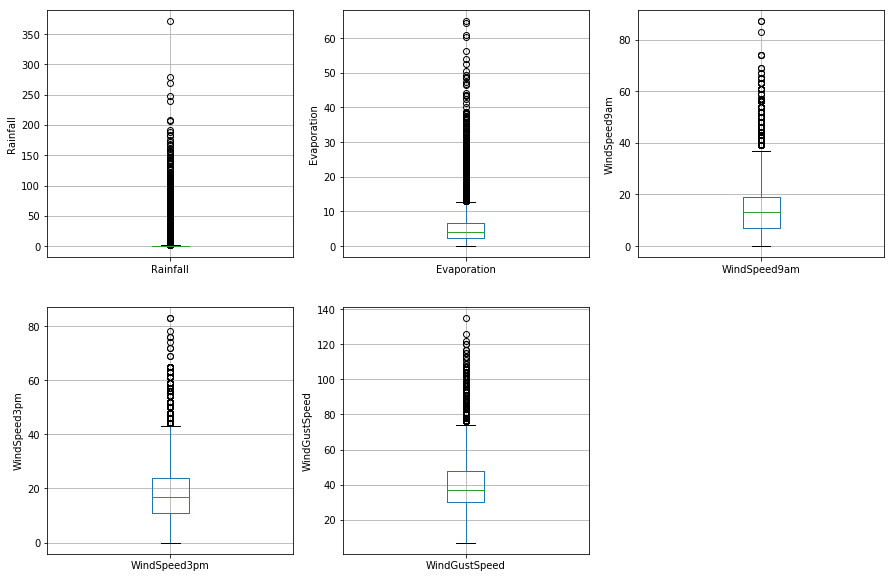

In [347]:
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 3, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 3, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 3, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(2, 3, 5)
fig = data.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


Text(0, 0.5, 'WindGustSpeed')

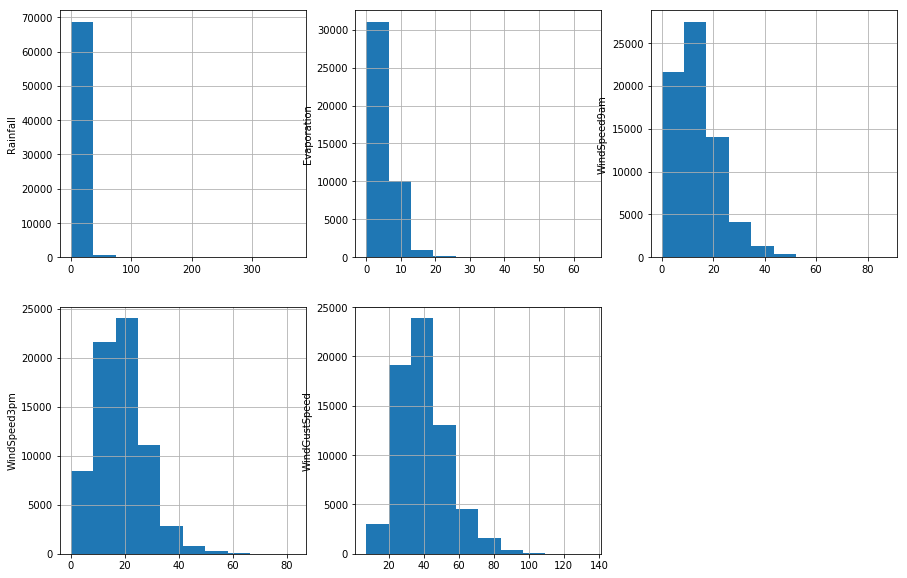

In [348]:
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 3, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 3, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 3, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(2, 3, 5)
fig = data.WindGustSpeed.hist(bins=10)
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


In [325]:
# def replace_outlines(df, col, value):
#     return np.where(df[col] > value, value, df[col])

In [330]:
# for col in numeric_cols:
#     data[col] = replace_outlines(data, col, data[col].quantile(0.85))

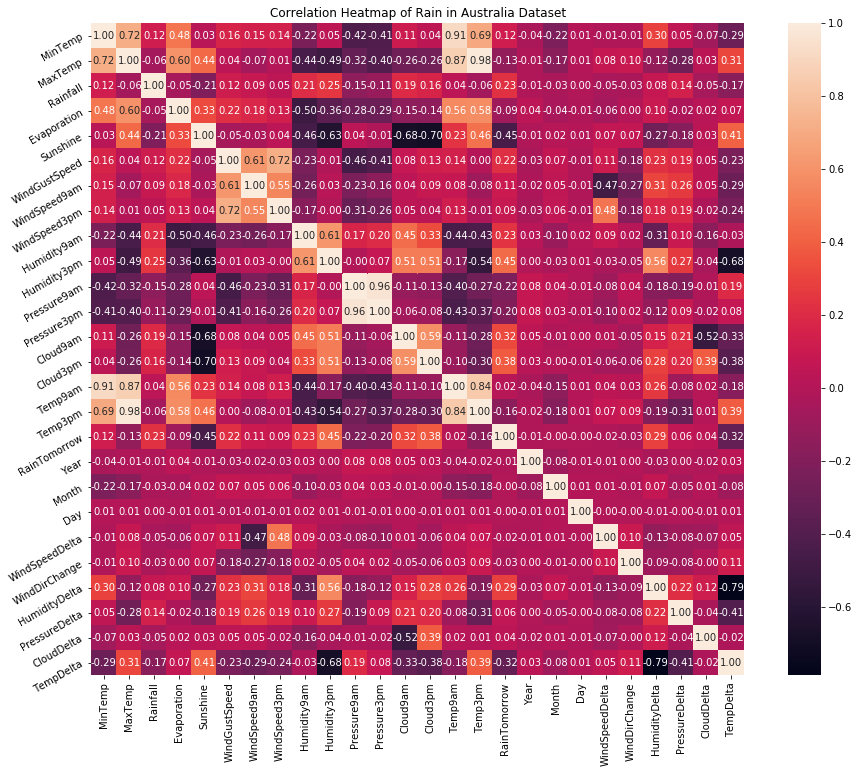

In [349]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(data.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

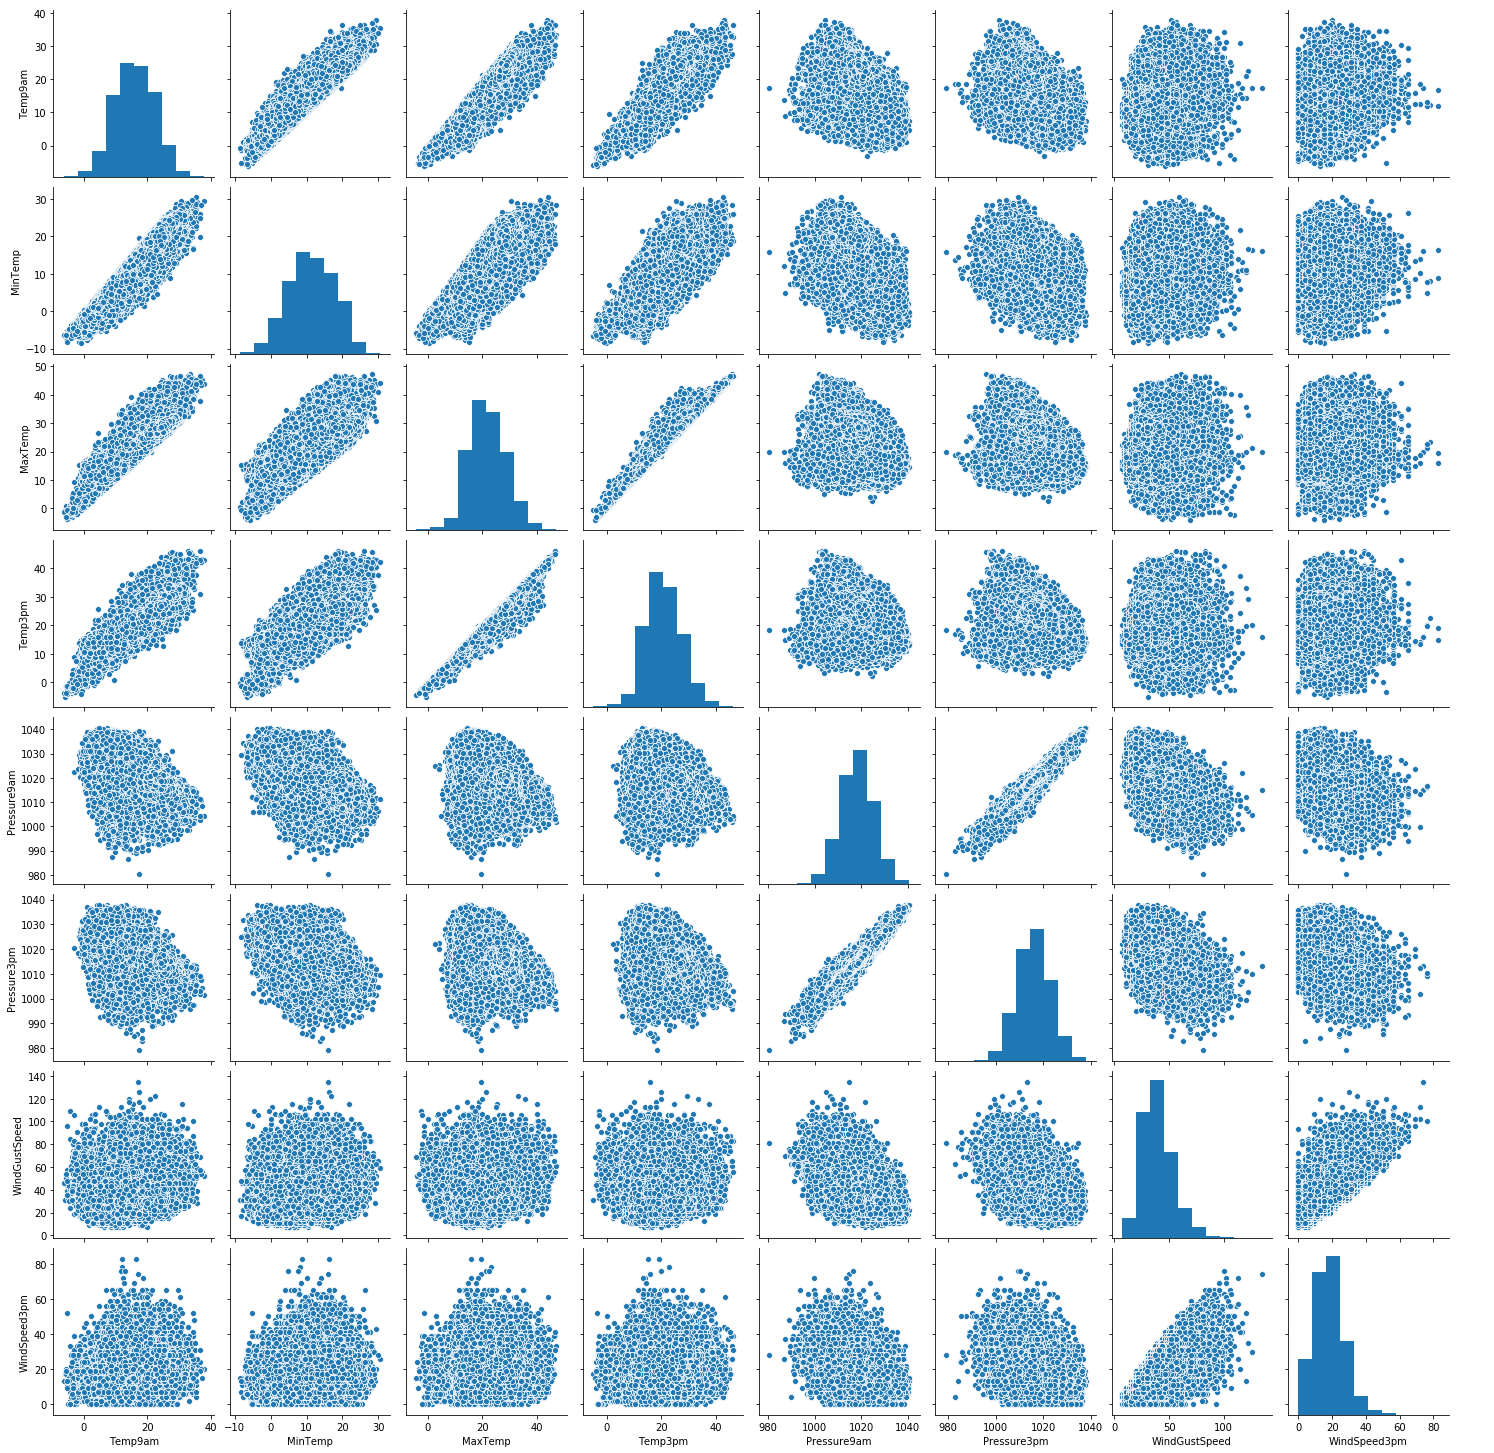

In [350]:
correlation_cols = ['Temp9am', 'MinTemp', 'MaxTemp', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'WindSpeed3pm']
sns.pairplot(data[correlation_cols], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [243]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [351]:
data.shape

(70240, 30)

In [270]:
y = data.RainTomorrow.apply(lambda x : x == 'Yes')
data.drop('RainTomorrow', axis=1, inplace=True)

In [460]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,WindSpeedDelta,WindDirChange,HumidityDelta,PressureDelta,CloudDelta,TempDelta
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,False,2008,12,1,4.0,True,-49.0,-0.6,NaN,4.9
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,False,2008,12,2,18.0,True,-19.0,-2.8,NaN,7.1
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,False,2008,12,3,7.0,True,-8.0,1.1,NaN,2.2
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,False,2008,12,4,-2.0,True,-29.0,-4.8,NaN,8.4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,False,2008,12,5,13.0,True,-49.0,-4.8,1.0,11.9


In [461]:
test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm,Year,Month,Day,WindSpeedDelta,WindDirChange,HumidityDelta,PressureDelta,CloudDelta,TempDelta
0,Albury,13.6,25.3,0.0,NaN,NaN,SE,48.0,SE,SE,...,23.8,2015,10,27,-9.0,False,-11.0,-2.2,NaN,8.0
1,Albury,6.2,25.5,0.0,NaN,NaN,NE,19.0,ENE,SSW,...,23.6,2015,10,28,5.0,True,-25.0,-5.5,NaN,8.8
2,Albury,9.3,27.9,0.0,NaN,NaN,SE,22.0,ESE,SSE,...,27.2,2015,10,29,6.0,True,-33.0,-3.0,NaN,8.7
3,Albury,9.7,28.1,0.0,NaN,NaN,ENE,28.0,SE,E,...,27.2,2015,10,30,8.0,True,-23.0,-3.9,NaN,9.4
4,Albury,17.1,21.7,5.4,NaN,NaN,ENE,28.0,SE,NE,...,19.2,2015,10,31,4.0,True,-13.0,-2.2,1.0,1.0


In [462]:
test.shape

(17601, 29)

In [469]:
test.isnull().sum()

Location              0
MinTemp              98
MaxTemp              57
Rainfall            163
Evaporation       10798
Sunshine          12438
WindGustDir         905
WindGustSpeed       905
WindDir9am         1153
WindDir3pm          721
WindSpeed9am         91
WindSpeed3pm        638
Humidity9am         224
Humidity3pm         758
Pressure9am        1798
Pressure3pm        1798
Cloud9am           7622
Cloud3pm           8000
Temp9am              50
Temp3pm             597
Year                  0
Month                 0
Day                   0
WindSpeedDelta      654
WindDirChange         0
HumidityDelta       782
PressureDelta      1805
CloudDelta         9287
TempDelta           601
dtype: int64

In [473]:
data.to_csv('train_preprocess.csv', index=False, sep=';')

In [474]:
test.to_csv('test_preprocess.csv', index=False, sep=';')